In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data_loader import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = split_dataset()

In [3]:
data.keys()

dict_keys(['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test'])

In [4]:
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']

In [5]:
# Fit a random forest regressor
rmse_test_list = []
rmse_train_list = []
for i in range(3, 20):
    rfr = RandomForestRegressor(n_estimators=i, n_jobs=-1, random_state=123)
    rfr.fit(X_train, y_train)
    y_pred_test = rfr.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    rmse_test_list.append(rmse_test)
    y_pred_train = rfr.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    rmse_train_list.append(rmse_train)
    print(f"For {i} estimator: Test RMSE: {rmse_test:.4f}, Train RMSE: {rmse_train:.4f}")

For 3 estimator: Test RMSE: 274.3833, Train RMSE: 43.6462
For 4 estimator: Test RMSE: 259.5900, Train RMSE: 45.4070
For 5 estimator: Test RMSE: 250.3046, Train RMSE: 44.0672
For 6 estimator: Test RMSE: 251.0484, Train RMSE: 39.4730
For 7 estimator: Test RMSE: 249.0974, Train RMSE: 44.5159
For 8 estimator: Test RMSE: 244.1683, Train RMSE: 47.3888
For 9 estimator: Test RMSE: 238.2971, Train RMSE: 49.4799
For 10 estimator: Test RMSE: 237.8555, Train RMSE: 46.4568
For 11 estimator: Test RMSE: 245.1234, Train RMSE: 48.9651
For 12 estimator: Test RMSE: 233.9768, Train RMSE: 52.1060
For 13 estimator: Test RMSE: 234.5584, Train RMSE: 53.0966
For 14 estimator: Test RMSE: 236.9170, Train RMSE: 51.3520
For 15 estimator: Test RMSE: 228.1471, Train RMSE: 52.1303
For 16 estimator: Test RMSE: 226.9311, Train RMSE: 55.2640
For 17 estimator: Test RMSE: 225.7974, Train RMSE: 53.8106
For 18 estimator: Test RMSE: 224.9448, Train RMSE: 56.1556
For 19 estimator: Test RMSE: 220.3091, Train RMSE: 56.7345


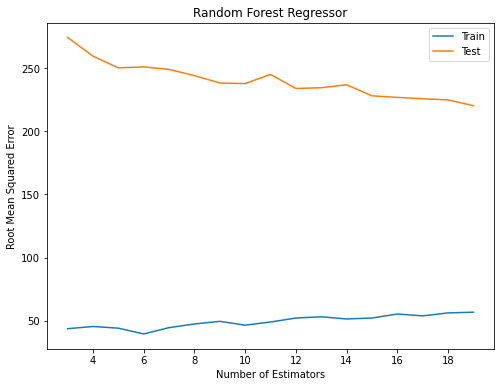

In [6]:
# Create a plot for MSE and R2 values
fig, ax1 = plt.subplots(figsize=(8, 6))

n_estimators = list(range(3, 20))

# Plot the MSE curve
ax1.plot(n_estimators, rmse_train_list, linestyle='-', label="Train")
ax1.plot(n_estimators, rmse_test_list, linestyle='-', label="Test")
ax1.set_xlabel("Number of Estimators")
ax1.set_ylabel("Root Mean Squared Error")
plt.title('Random Forest Regressor')
ax1.legend()

In [7]:
# Identify the most important features
rf_feature_importances = rfr.feature_importances_
for i, feature_name in enumerate(X_train.columns):
    print(f"{feature_name}: {rf_feature_importances[i]:.3f}")

RM: 0.000
PTRATIO: 0.035
LSTAT: 0.000
year: 0.005
Units Sold: 0.045
Active Listings: 0.021
Months Supply of Inventory: 0.076
New Listings: 0.060
Pending Sales: 0.141
Days to Off Market: 0.044
Sold to Original Price Ratio: 0.008
Price per Square Foot: 0.562
month: 0.003
